# 1. AHC

In [40]:

from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

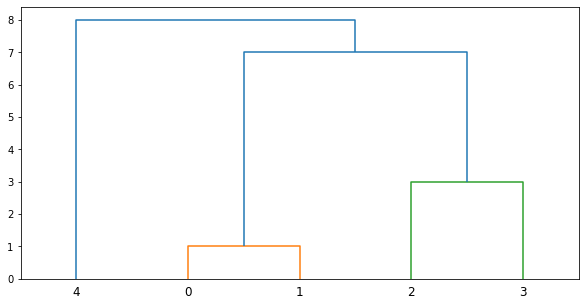

In [41]:
#  Single linkage with dendrogram
X = [[i] for i in [1, 2, 9, 12, 20]]

Single_linkage = linkage(X, 'single')
fig = plt.figure(figsize=(10,5))
dendro = dendrogram(Single_linkage)

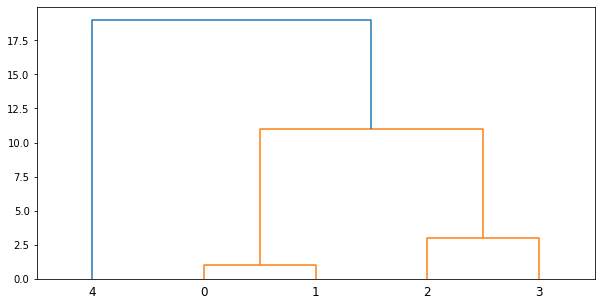

In [42]:
#  Complete linkage with dendrogram
Complete_linkage = linkage(X, "complete")
fig = plt.figure(figsize=(10, 5))
dendro = dendrogram(Complete_linkage)

## 1.1 Two more datasets

In [43]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale

### 1.1.1 Iris Datasets

In [44]:
# Iris dataset
iris_data=load_iris()
iris_data_da = scale(iris_data.data)
target = pd.DataFrame(iris_data.target)
variable_names = iris_data.feature_names
iris_data_da[0:10]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

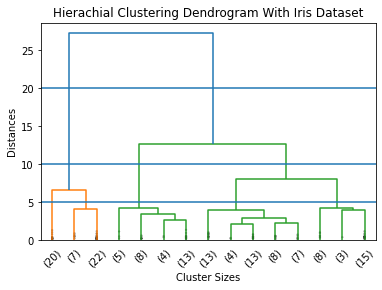

In [45]:
Z= linkage(iris_data_da,"ward")
#generate dendrogram
dendrogram(Z,truncate_mode= "lastp", p =15, leaf_rotation=45,leaf_font_size=10, show_contracted=True)
plt.title("Hierachial Clustering Dendrogram With Iris Dataset")
plt.xlabel("Cluster Sizes")
plt.ylabel("Distances")
#divide the cluster
plt.axhline(y=20)
plt.axhline(5)
plt.axhline(10)
plt.show()

### 1.1.2 Seeds Datasets

In [46]:
Seed_data=pd.read_csv('./seeds_dataset.csv')
Seed_data.head()


,15.26,14.84,0.871,5.763,3.312,2.221,5.22,1
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


In [47]:
from sklearn.preprocessing import normalize
data_scaled = normalize(Seed_data)
data_scaled = pd.DataFrame(data_scaled, columns=Seed_data.columns)
data_scaled.head()

,15.26,14.84,0.871,5.763,3.312,2.221,5.22,1
0,0.663447,0.649625,0.039285,0.247633,0.148607,0.045389,0.220971,0.044586
1,0.656191,0.647007,0.041557,0.242960,0.153234,0.123937,0.221562,0.045920
2,0.648384,0.653069,0.041953,0.249422,0.158301,0.105831,0.225107,0.046849
3,0.681837,0.633255,0.038164,0.239023,0.150477,0.057242,0.218619,0.042245
4,0.655596,0.647845,0.040808,0.245552,0.150997,0.112245,0.225948,0.045591


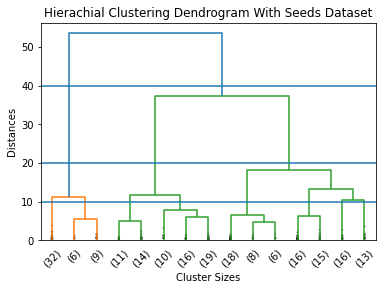

In [48]:
Z1= linkage(Seed_data,"ward")
#generate dendrogram
dendrogram(Z1,truncate_mode= "lastp", p =15, leaf_rotation=45,leaf_font_size=10, show_contracted=True)
plt.title("Hierachial Clustering Dendrogram With Seeds Dataset")
plt.xlabel("Cluster Sizes")
plt.ylabel("Distances")
#divide the cluster
plt.axhline(y=40)
plt.axhline(10)
plt.axhline(20)
plt.show()

# 2. K-means

## 2.1 Iris datasets

#### The elbow method

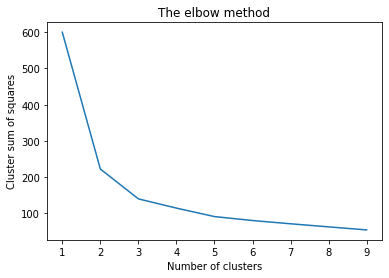

In [49]:
from sklearn.cluster import KMeans 
arrary = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, random_state = 0, n_init = 15)
    kmeans.fit(iris_data_da)
    arrary.append(kmeans.inertia_)
plt.plot(range(1, 10), arrary)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster sum of squares') 
plt.show()

### K=3

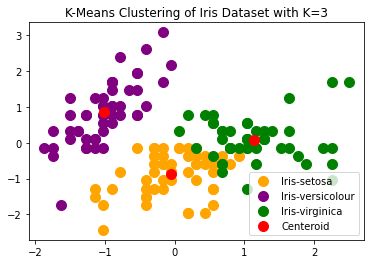

In [50]:
Iris_kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 15, random_state = 0)
y_predict = Iris_kmeans.fit_predict(iris_data_da)
#Visualising the clusters
plt.scatter(iris_data_da[y_predict == 0, 0], iris_data_da[y_predict == 0, 1], s = 100, c = 'orange', label = 'Iris-setosa')
plt.scatter(iris_data_da[y_predict == 1, 0], iris_data_da[y_predict == 1, 1], s = 100, c = 'purple', label = 'Iris-versicolour')
plt.scatter(iris_data_da[y_predict == 2, 0], iris_data_da[y_predict == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the Centeroid of the clusters
plt.scatter(Iris_kmeans.cluster_centers_[:, 0], Iris_kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centeroid')
plt.title("K-Means Clustering of Iris Dataset with K=3")
plt.legend()

In [51]:
Accuracy=np.sum(y_predict)/len(target)
print("Accuracy + K=3:",Accuracy)

Accuracy + K=3: 0.96


### K=4

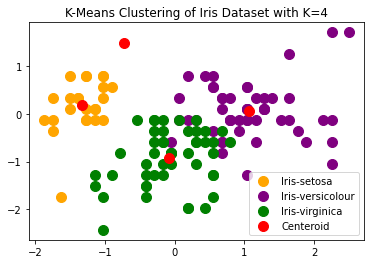

In [52]:
Iris_kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 15, random_state = 0)
y_predict1 = Iris_kmeans.fit_predict(iris_data_da)
#Visualising the clusters
plt.scatter(iris_data_da[y_predict1 == 0, 0], iris_data_da[y_predict1 == 0, 1], s = 100, c = 'orange', label = 'Iris-setosa')
plt.scatter(iris_data_da[y_predict1 == 1, 0], iris_data_da[y_predict1 == 1, 1], s = 100, c = 'purple', label = 'Iris-versicolour')
plt.scatter(iris_data_da[y_predict1 == 2, 0], iris_data_da[y_predict1 == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the Centeroid of the clusters
plt.scatter(Iris_kmeans.cluster_centers_[:, 0], Iris_kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centeroid')
plt.title("K-Means Clustering of Iris Dataset with K=4")
plt.legend()

In [53]:
Accuracy1=np.sum(y_predict1)/len(target)
print("Accuracy + K=4:",Accuracy1)

Accuracy + K=4: 1.5133333333333334


#### 2.1.1 PCA

In [54]:
#  Standarding
from sklearn.preprocessing import StandardScaler
iris_X = iris_data.data
X_std_trans = StandardScaler().fit_transform(iris_X)

In [55]:
X_PCA_covariance_matrix = np.cov(X_std_trans.T)
X_PCA_covariance_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [56]:
Eigenvalues, Eigenvectors = np.linalg.eig(X_PCA_covariance_matrix)
print('Eigenvalues:  \n', Eigenvalues)
print('Eigenvectors: \n', Eigenvectors)

Eigenvalues:  
 [2.93808505 0.9201649  0.14774182 0.02085386]
Eigenvectors: 
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [57]:
Eig_pairs = [(np.abs(Eigenvalues[i]), Eigenvectors[:,i]) for i in range(len(Eigenvalues))]

Eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Eigenvalues in descending order:')
for i in Eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.938085050199996
0.9201649041624885
0.147741821044948
0.020853862176462127


In [58]:
V_trans_matrix = np.hstack((Eig_pairs[0][1].reshape(4,1),
                      Eig_pairs[1][1].reshape(4,1)))
V_trans_matrix

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

In [59]:
# Two principal component
Y = X_std_trans.dot(V_trans_matrix)
Y[0:5]

array([[-2.26470281, -0.4800266 ],
       [-2.08096115,  0.67413356],
       [-2.36422905,  0.34190802],
       [-2.29938422,  0.59739451],
       [-2.38984217, -0.64683538]])

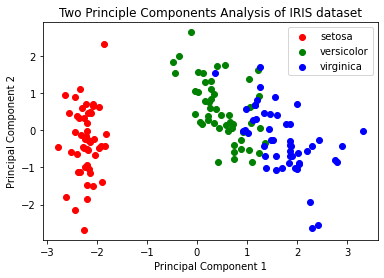

In [60]:
target_names_irisdata =  iris_data.target_names
y =  iris_data.target
for c, i, target_name in zip("rgb", [0, 1, 2], target_names_irisdata):
    plt.scatter(Y[y==i,0], Y[y==i,1], c=c, label=target_name)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('Two Principle Components Analysis of IRIS dataset')
plt.show()

#### k-means for the iris datasets in 2D after the use of PCA

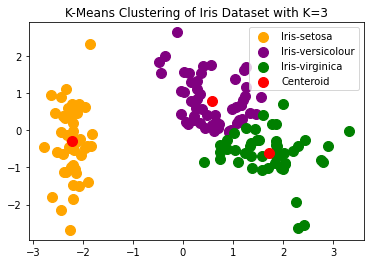

In [61]:
Iris_kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 15, random_state = 0)
y_predict_pca = Iris_kmeans.fit_predict(Y)
#Visualising the clusters
plt.scatter(Y[y_predict_pca == 0, 0], Y[y_predict_pca == 0, 1], s = 100, c = 'orange', label = 'Iris-setosa')
plt.scatter(Y[y_predict_pca == 1, 0], Y[y_predict_pca == 1, 1], s = 100, c = 'purple', label = 'Iris-versicolour')
plt.scatter(Y[y_predict_pca == 2, 0], Y[y_predict_pca == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the Centeroid of the clusters
plt.scatter(Iris_kmeans.cluster_centers_[:, 0], Iris_kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centeroid')
plt.title("K-Means Clustering of Iris Dataset with K=3")
plt.legend()

In [62]:
Accuracy_pca=np.sum(y_predict_pca)/len(target)
print("Accuracy after using PCA:",Accuracy_pca)

Accuracy after using PCA: 0.98


## 2.2 Accelerometer Datasets

In [63]:
data_accele=pd.read_csv('./accelerometer.csv')
data_accele.head()


,wconfid,pctid,x,y,z
0,1,20,1.004,0.090,-0.125
1,1,20,1.004,-0.043,-0.125
2,1,20,0.969,0.090,-0.121
3,1,20,0.973,-0.012,-0.137
4,1,20,1.000,-0.016,-0.121


#### The elbow method

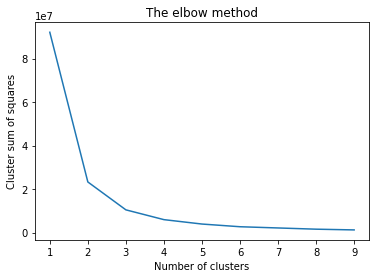

In [64]:
from sklearn.cluster import KMeans 
arrary = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, random_state = 0, n_init = 15)
    kmeans.fit(data_accele)
    arrary.append(kmeans.inertia_)
plt.plot(range(1, 10), arrary)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster sum of squares') 
plt.show()

In [65]:
Accele_data_da = scale(data_accele)

#### K=5

C:\Users\ADMIN\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\pylabtools.py:137: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


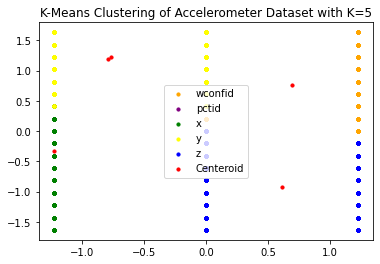

In [79]:
Acce_kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 25, random_state = 0)
y_predict_acc = Acce_kmeans.fit_predict(Accele_data_da)
#Visualising the clusters
plt.scatter(Accele_data_da[y_predict_acc == 0, 0], Accele_data_da[y_predict_acc == 0, 1], s = 10, c = 'orange', label = 'wconfid')
plt.scatter(Accele_data_da[y_predict_acc == 1, 0], Accele_data_da[y_predict_acc == 1, 1], s = 10, c = 'purple', label = 'pctid')
plt.scatter(Accele_data_da[y_predict_acc == 2, 0], Accele_data_da[y_predict_acc == 2, 1], s = 10, c = 'green', label = 'x')
plt.scatter(Accele_data_da[y_predict_acc == 3, 0], Accele_data_da[y_predict_acc == 3, 1], s = 10, c = 'yellow', label = 'y')
plt.scatter(Accele_data_da[y_predict_acc == 4, 0], Accele_data_da[y_predict_acc == 4, 1], s = 10, c = 'blue', label = 'z')
#Plotting the Centeroid of the clusters
plt.scatter(Acce_kmeans.cluster_centers_[:, 0], Acce_kmeans.cluster_centers_[:,1], s = 10, c = 'red', label = 'Centeroid')
plt.title("K-Means Clustering of Accelerometer Dataset with K=5")
plt.legend()

In [80]:

Accuracy=np.sum(y_predict_acc)/len(data_accele)
print("Accuracy + K=5:",Accuracy)

Accuracy + K=5: 2.0091633986928104


### K=7

C:\Users\ADMIN\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\pylabtools.py:137: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


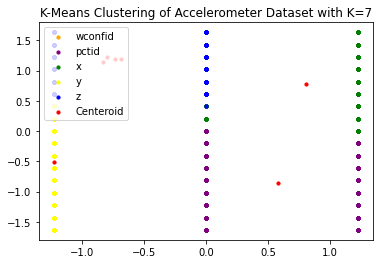

In [68]:
Acce_kmeans = KMeans(n_clusters = 7, init = 'k-means++', max_iter = 300, n_init = 25, random_state = 0)
y_predict_acc1 = Acce_kmeans.fit_predict(Accele_data_da)
#Visualising the clusters
plt.scatter(Accele_data_da[y_predict_acc1 == 0, 0], Accele_data_da[y_predict_acc1 == 0, 1], s = 10, c = 'orange', label = 'wconfid')
plt.scatter(Accele_data_da[y_predict_acc1 == 1, 0], Accele_data_da[y_predict_acc1 == 1, 1], s = 10, c = 'purple', label = 'pctid')
plt.scatter(Accele_data_da[y_predict_acc1 == 2, 0], Accele_data_da[y_predict_acc1 == 2, 1], s = 10, c = 'green', label = 'x')
plt.scatter(Accele_data_da[y_predict_acc1 == 3, 0], Accele_data_da[y_predict_acc1 == 3, 1], s = 10, c = 'yellow', label = 'y')
plt.scatter(Accele_data_da[y_predict_acc1 == 4, 0], Accele_data_da[y_predict_acc1 == 4, 1], s = 10, c = 'blue', label = 'z')
#Plotting the Centeroid of the clusters
plt.scatter(Acce_kmeans.cluster_centers_[:, 0], Acce_kmeans.cluster_centers_[:,1], s = 10, c = 'red', label = 'Centeroid')
plt.title("K-Means Clustering of Accelerometer Dataset with K=7")
plt.legend()

In [69]:
Accuracy=np.sum(y_predict_acc1)/len(data_accele)
print("Accuracy + K=7:",Accuracy)

Accuracy + K=7: 2.1072875816993464


#### 2.1.1 PCA

In [70]:
X_std_trans_Accele = StandardScaler().fit_transform(data_accele)

In [71]:
X_Accele_covariance_matrix=np.cov(X_std_trans_Accele.T)
X_Accele_covariance_matrix

array([[ 1.00000654e+00, -3.71528042e-19, -6.06508746e-03,
         5.37104192e-03,  2.22837628e-03],
       [-3.71528042e-19,  1.00000654e+00,  2.12849280e-03,
         2.88174556e-03,  8.96455590e-03],
       [-6.06508746e-03,  2.12849280e-03,  1.00000654e+00,
         2.11369848e-02, -9.11649541e-02],
       [ 5.37104192e-03,  2.88174556e-03,  2.11369848e-02,
         1.00000654e+00, -2.77157745e-02],
       [ 2.22837628e-03,  8.96455590e-03, -9.11649541e-02,
        -2.77157745e-02,  1.00000654e+00]])

In [72]:
Eigenvalues_Accele, Eigenvectors_Accele = np.linalg.eig(X_Accele_covariance_matrix)
print('Eigenvalues:  \n', Eigenvalues_Accele)
print('Eigenvectors: \n', Eigenvectors_Accele)

Eigenvalues:  
 [1.10307152 0.90782481 0.98441269 1.00401092 1.00071274]
Eigenvectors: 
 [[-0.03727795  0.02523764 -0.40979266  0.76852115  0.48930424]
 [-0.03628142 -0.08698171 -0.21728163  0.43752949 -0.86745287]
 [ 0.66406168  0.69453611 -0.254733   -0.07949737 -0.07370854]
 [ 0.31503654  0.05592847  0.83103962  0.45496234  0.00253047]
 [-0.6760681   0.71153977  0.17129775  0.06806344 -0.05164814]]


In [73]:
# Make a list of (eigenvalue, eigenvector) tuples
Eig_pairs = [(np.abs(Eigenvalues_Accele[i]), Eigenvectors_Accele[:,i]) for i in range(len(Eigenvalues_Accele))]
Eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in Eig_pairs:
    print(i[0])

Eigenvalues in descending order:
1.103071524005504
1.0040109166871491
1.0007127398403595
0.9844126931210018
0.9078248062981319


In [74]:
V_trans_matrix_Accele= np.hstack((Eig_pairs[0][1].reshape(5,1),
                      Eig_pairs[1][1].reshape(5,1)))
V_trans_matrix_Accele

array([[-0.03727795,  0.76852115],
       [-0.03628142,  0.43752949],
       [ 0.66406168, -0.07949737],
       [ 0.31503654,  0.45496234],
       [-0.6760681 ,  0.06806344]])

In [75]:
# Two principal component
Y_Accele= X_std_trans_Accele.dot(V_trans_matrix_Accele)
Y_Accele[0:5]

array([[ 0.15745795, -1.60567644],
       [ 0.1010347 , -1.68716049],
       [ 0.12219696, -1.6015548 ],
       [ 0.1032796 , -1.66656357],
       [ 0.10382637, -1.66968116]])

Text(0.5, 1.0, 'PCA of Accelerometer dataset')

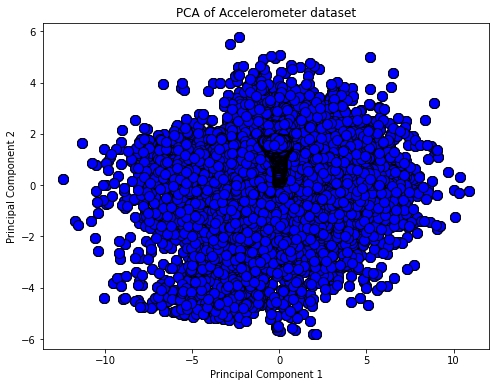

In [76]:
plt.figure(2, figsize=(8, 6))
plt.clf()
# target_names =  data.target_names
# Plot the training points
x=data_accele["pctid"];
y=data_accele["wconfid"];
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(Y_Accele[i:, 0], Y_Accele[i:, 1],s=100,c=c,cmap=plt.cm.Set1,
        edgecolor="k")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Accelerometer dataset")

#### k-means for the accelerometer datasets in 2D after the use of PCA

C:\Users\ADMIN\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\pylabtools.py:137: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


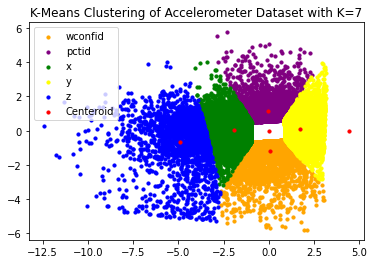

In [77]:
Acce_kmeans = KMeans(n_clusters = 7, init = 'k-means++', max_iter = 300, n_init = 25, random_state = 0)
y_predict_acc_pca = Acce_kmeans.fit_predict(Y_Accele)
#Visualising the clusters
plt.scatter(Y_Accele[y_predict_acc_pca == 0, 0], Y_Accele[y_predict_acc_pca == 0, 1], s = 10, c = 'orange', label = 'wconfid')
plt.scatter(Y_Accele[y_predict_acc_pca == 1, 0], Y_Accele[y_predict_acc_pca == 1, 1], s = 10, c = 'purple', label = 'pctid')
plt.scatter(Y_Accele[y_predict_acc_pca == 2, 0], Y_Accele[y_predict_acc_pca == 2, 1], s = 10, c = 'green', label = 'x')
plt.scatter(Y_Accele[y_predict_acc_pca == 3, 0], Y_Accele[y_predict_acc_pca == 3, 1], s = 10, c = 'yellow', label = 'y')
plt.scatter(Y_Accele[y_predict_acc_pca == 4, 0], Y_Accele[y_predict_acc_pca == 4, 1], s = 10, c = 'blue', label = 'z')
#Plotting the Centeroid of the clusters
plt.scatter(Acce_kmeans.cluster_centers_[:, 0], Acce_kmeans.cluster_centers_[:,1], s = 10, c = 'red', label = 'Centeroid')
plt.title("K-Means Clustering of Accelerometer Dataset with K=7")
plt.legend()

In [78]:
Accuracy_pca_acc=np.sum(y_predict_acc_pca)/len(data_accele)
print("Accuracy after using PCA:",Accuracy_pca_acc)

Accuracy after using PCA: 2.2884052287581698
